In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churnData['TotalCharges'].value_counts(dropna=False)
churnData['Churn']=churnData['Churn'].replace("Yes",1)
churnData['Churn']=churnData['Churn'].replace("No",0)

In [7]:
churnData['TotalCharges']=churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean())

In [8]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# X/y Split

X = churnData.drop('Churn', axis=1)
y = churnData['Churn']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
# Splitting my numerical values

X_train_num = X_train[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
X_test_num = X_test[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.340191,-0.435476,-0.514314,-0.462171
1,0.883210,2.296336,0.017840,0.555404
2,-1.196572,-0.435476,-0.819594,-0.950644
3,1.168670,-0.435476,-1.483535,-0.441989
4,-0.829552,-0.435476,0.658427,-0.539130


In [11]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

LR = LogisticRegression(random_state=32, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print("score: ",LR.score(X_test_scaled, y_test))

score:  0.7830777967064169


<AxesSubplot:>

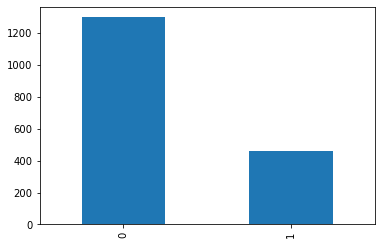

In [13]:
# Checking for data imbalance
count_classes = y_test.value_counts()
count_classes.plot(kind = 'bar')

### Downsampling

In [18]:
from sklearn.utils import resample

category_0 = churnData[churnData['Churn'] == 0]
category_1 = churnData[churnData['Churn'] == 1]

category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [19]:
print(category_0_undersampled.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [20]:
churn_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
churn_downsampled['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [26]:
# X/y Split

X = churn_downsampled.drop('Churn', axis=1)
y = churn_downsampled['Churn']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
# Splitting my numerical values

X_train_num = X_train[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
X_test_num = X_test[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1.145109,-0.474434,-0.840889,0.199936
1,-1.135066,-0.474434,0.053150,-0.928800
2,-0.886320,-0.474434,0.005819,-0.731274
3,-0.803404,-0.474434,-0.830371,-0.772200
4,0.481785,-0.474434,-1.698115,-0.623404


In [28]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

LR = LogisticRegression(random_state=32, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print("score: ",LR.score(X_test_scaled, y_test))

score:  0.7229946524064171


### Upsampling

In [22]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [23]:
print(category_0.shape)
print(category_1_oversampled.shape)

(5174, 16)
(5174, 16)


In [25]:
churn_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)
churn_upsampled['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [29]:
# X/y Split

X = churn_upsampled.drop('Churn', axis=1)
y = churn_upsampled['Churn']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
# Splitting my numerical values

X_train_num = X_train[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
X_test_num = X_test[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.451187,-0.479127,-1.479773,-0.760930
1,-0.990663,2.087129,1.101395,-0.777035
2,1.333236,-0.479127,-1.661667,-0.419445
3,-0.700176,2.087129,0.256019,-0.581092
4,1.167243,-0.479127,0.465631,1.180673


In [31]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

LR = LogisticRegression(random_state=32, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print("score: ",LR.score(X_test_scaled, y_test))

score:  0.7321221492075763
